In [425]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

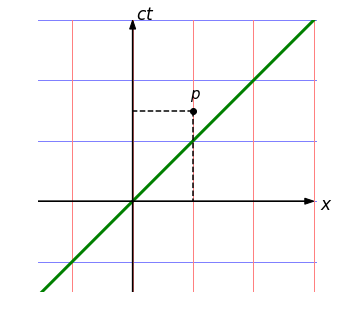

In [552]:
fig = plt.figure(figsize=(5,5))
def plot_spacetime():
    def offset(v):
        return v/abs(v)*((v**-2)-1)**-.5 if v != 0 else 0
    def plot_grid(ax, v):
        factor = offset(v)
        y = np.linspace(-4, 4, 9).reshape((-1,1))
        x = np.linspace(-4, 4, 9).reshape((-1,1))
        Y = y.T + factor * np.array([x[0], x[-1]])
        X = np.array([x[0], x[-1]])
        ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)

        Y = (np.hstack([y[0], y[-1]])).T
        X = (np.hstack([y[0], y[-1]]) * factor + x).T
        ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
        ax.arrow(0,-2.,0,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(0.05, 3, r'$ct$', fontsize=17)
        ax.arrow(-2.,0,5,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(3.1, -0.15, r'$x$', fontsize=17)
        #ax.arrow(-2 * factor,-2.,5 * factor,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        #ax.text(3 * factor, 3, r'$ct^\prime$', fontsize=17)
        #ax.arrow(-2.,-2 * factor,5,5 * factor,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        #ax.text(3.1, 3 * factor, r'$x^\prime$', fontsize=17)
        ax.plot([-2,3],[-2,3],color='g',linewidth=3)

    ax = fig.add_subplot(1, 1, 1)
    plot_grid(ax, 0)
    ax.plot([1,1],[1.5,0],color='k',linestyle='--', zorder=10)
    ax.plot([1,0],[1.5,1.5],color='k',linestyle='--', zorder=10)
    ax.plot([1],[1.5],'o',color='k', zorder=10)
    ax.text(1-.05,1.7,r'$p$',fontsize=15)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()

plot_spacetime()
plt.savefig('spacetime.pdf', bbox_inches='tight')

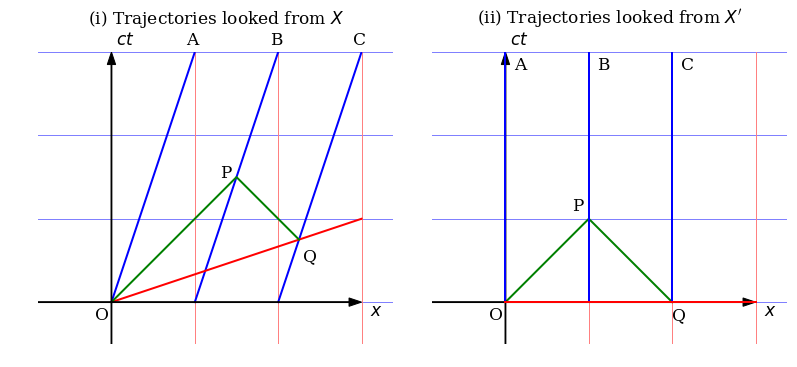

In [743]:
fig = plt.figure(figsize=(11,5))
def plot_spacetime():
    def offset(v):
        return v/abs(v)*((v**-2)-1)**-.5 if v != 0 else 0
    def plot_grid(ax, v):
        factor = offset(v)
        y = np.linspace(-4, 4, 9).reshape((-1,1))
        x = np.linspace(-4, 4, 9).reshape((-1,1))
        Y = y.T + factor * np.array([x[0], x[-1]])
        X = np.array([x[0], x[-1]])
        ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)

        Y = (np.hstack([y[0], y[-1]])).T
        X = (np.hstack([y[0], y[-1]]) * factor + x).T
        ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
        ax.arrow(0,-2.,0,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(0.05, 3.1, r'$ct$', fontsize=17)
        ax.arrow(-2.,0,5,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(3.1, -0.15, r'$x$', fontsize=17)
        #ax.arrow(-2 * factor,-2.,5 * factor,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        #ax.text(3 * factor, 3, r'$ct^\prime$', fontsize=17)
        #ax.arrow(-2.,-2 * factor,5,5 * factor,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        #ax.text(3.1, 3 * factor, r'$x^\prime$', fontsize=17)
        #ax.plot([-2,3],[-2,3],color='g',linewidth=3)

    ax = fig.add_subplot(1, 2, 1)
    plot_grid(ax, 0)
    for x in range(3):
        ax.plot([x,x+1],[0,3],color='b',linewidth=2, zorder=5)
        ax.text(x+.9,3.1,chr(ord('A')+x),fontsize=17)
    ax.plot([0,3],[0,1],color='r',linewidth=2, zorder=5)
    ax.plot([0,1.5,2.25],[0,1.5,0.75],color='g',linewidth=2, zorder=5)
    ax.text(-.2,-.2,'O',fontsize=17)
    ax.text(1.5-.2,1.5,r'P',fontsize=17)
    ax.text(2.3,.5,'Q',fontsize=17)
    ax.axis('equal')
    ax.set_title(r'(i) Trajectories looked from $X$', y=1.08, fontsize=17)
    ax.set_xlim([-.5,3])
    ax.set_ylim([-.5,3])
    ax.set_axis_off()

    ax = fig.add_subplot(1, 2, 2)
    plot_grid(ax, 0)
    for x in range(3):
        ax.plot([x,x],[0,3],color='b',linewidth=2, zorder=15)
        ax.text(x+.1,2.8,chr(ord('A')+x),fontsize=17)
    ax.plot([0,3],[0,0],color='r',linewidth=2, zorder=15)
    ax.plot([0,1,2],[0,1,0],color='g',linewidth=2, zorder=5)
    ax.text(-.2,-.2,'O',fontsize=17)
    ax.text(1-.2,1.1,r'P',fontsize=17)
    ax.text(2.,-.2,'Q',fontsize=17)
    ax.axis('equal')
    ax.set_title(r'(ii) Trajectories looked from $X^\prime$', y=1.08, fontsize=17)
    ax.set_xlim([-.5,3])
    ax.set_ylim([-.5,3])
    ax.set_axis_off()
    plt.tight_layout(pad=0.4)

plot_spacetime()
plt.savefig('spacetime-simul.pdf', bbox_inches='tight')

[[ 1.04828484  0.31448545]
 [ 0.31448545  1.04828484]]
[[ 1.04828484 -0.31448545]
 [-0.31448545  1.04828484]]


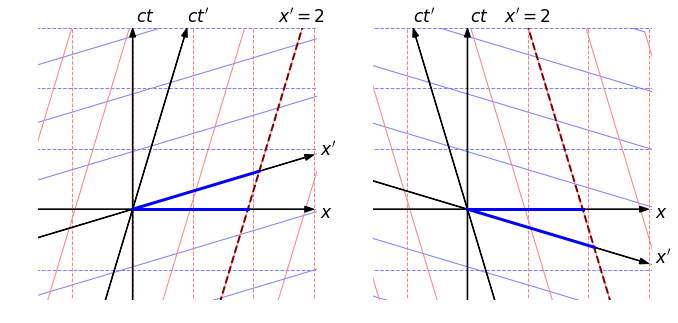

In [672]:
fig = plt.figure(figsize=(11,5))
def plot_spacetime():
    def plot_grid(ax, v):
        f = 1/((1 - v**2)**(.5))
        y = np.linspace(-4, 4, 9).reshape((-1,1))
        x = np.linspace(-4, 4, 9).reshape((-1,1))
        Y = np.vstack([y.T, y.T])
        X = (np.array([x[0], x[-1]]))
        ax.plot(X,Y,'--',color=[0.5,0.5,1],linewidth=1)
        Y = f * (y.T + v * np.array([x[0], x[-1]]))
        X = f * (np.array([x[0], x[-1]]) + v * y.T)
        ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)

        Y = np.array([y[0], y[-1]])
        X = (np.vstack([x.T, x.T]))
        ax.plot(X,Y,'--',color=[1,0.5,0.5],linewidth=1)
        Y = f * ((np.vstack([y[0], y[-1]])) + v * x.T)
        X = f * ((np.hstack([y[0], y[-1]])) * v + x).T
        ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
        ax.arrow(0,-2.,0,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(0.05, 3.1, r'$ct$', fontsize=17)
        ax.arrow(-2.,0,5,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(3.1, -0.15, r'$x$', fontsize=17)
        ax.arrow(-2 * v,-2.,5 * v,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(3 * v, 3.1, r'$ct^\prime$', fontsize=17)
        ax.arrow(-2.,-2 * v,5,5 * v,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(3.1, 3 * v, r'$x^\prime$', fontsize=17)
        cnv = f * np.matrix([[1, v], [v,1]])
        v0 = cnv * np.vstack([2,-3])
        v1 = cnv * np.vstack([2,0])
        v2 = cnv * np.vstack([2,4])
        ax.plot([v0[0,0],v2[0,0]],[v0[1,0],v2[1,0]],'--',color=[.5,0,0],linewidth=2, zorder=5)
        ax.text(3 * v + 1.5, 3.1, r'$x^\prime=2$', fontsize=17,rotation=0)
        ax.plot([0,v1[0]], [0,v1[1]],color='b',linewidth=3, zorder=15)
        ax.plot([0,2/f], [0,0],color='b',linewidth=3, zorder=15)
        #ax.plot([2,2], [0,2*v],color='b',linewidth=3, zorder=15)
        #ax.plot([-2,3],[-2,3],color='g',linewidth=3)

    ax = fig.add_subplot(1, 2, 1)
    plot_grid(ax, 0.3)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()

    ax = fig.add_subplot(1, 2, 2)
    plot_grid(ax, -.3)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()

plot_spacetime()
plt.savefig('spacetime-contraction.pdf', bbox_inches='tight')

[[ 0.9539392  0.3      ]
 [-0.3        0.9539392]]
0.291456794478
[[ 0.9539392 -0.3      ]
 [ 0.3        0.9539392]]
-0.291456794478


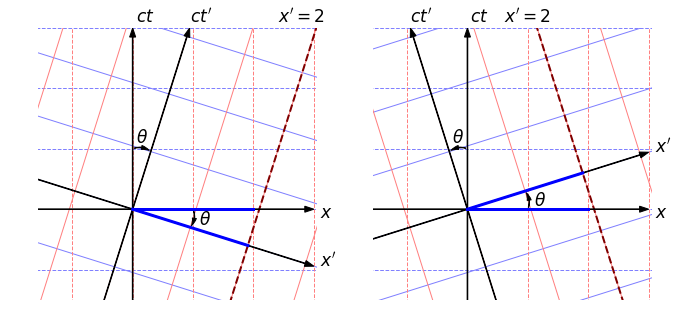

In [715]:
fig = plt.figure(figsize=(11,5))
def plot_spacetime():
    def plot_grid(ax, v):
        f = (1-v**2)**.5
        y = np.linspace(-4, 4, 9).reshape((-1,1))
        x = np.linspace(-4, 4, 9).reshape((-1,1))
        Y = np.vstack([y.T, y.T])
        X = (np.array([x[0], x[-1]]))
        ax.plot(X,Y,'--',color=[0.5,0.5,1],linewidth=1)
        Y = (f * y.T - v * np.array([x[0], x[-1]]))
        X = (f * np.array([x[0], x[-1]]) + v * y.T)
        ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)

        Y = np.array([y[0], y[-1]])
        X = (np.vstack([x.T, x.T]))
        ax.plot(X,Y,'--',color=[1,0.5,0.5],linewidth=1)
        Y = (f * (np.vstack([y[0], y[-1]])) + v * x.T)
        X = ((np.hstack([y[0], y[-1]])) * v - f * x).T
        
        vp = v / f
        ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
        ax.arrow(0,-2.,0,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(0.05, 3.1, r'$ct$', fontsize=17)
        ax.arrow(-2.,0,5,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(3.1, -0.15, r'$x$', fontsize=17)
        ax.arrow(-3 * vp,-3.,6 * vp,6,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(3 * vp, 3.1, r'$ct^\prime$', fontsize=17)
        ax.arrow(-3.,-3 * -vp,6,6 * -vp,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=10)
        ax.text(3.1, 3 * -vp, r'$x^\prime$', fontsize=17)
        cnv = np.matrix([[f, v], [-v,f]])
        print(cnv)
        v0 = cnv * np.vstack([2,-3])
        v1 = cnv * np.vstack([2,0])
        v2 = cnv * np.vstack([2,4])
        ax.plot([v0[0,0],v2[0,0]],[v0[1,0],v2[1,0]],'--',color=[.5,0,0],linewidth=2, zorder=5)
        ax.text(3 * v + 1.5, 3.1, r'$x^\prime=2$', fontsize=17,rotation=0)
        ax.plot([0,v1[0]], [0,v1[1]],color='b',linewidth=3, zorder=15)
        ax.plot([0,2], [0,0],color='b',linewidth=3, zorder=15)
        #ax.plot([2,2], [0,2*v],color='b',linewidth=3, zorder=15)
        #ax.plot([-2,3],[-2,3],color='g',linewidth=3)
        v05 = cnv * np.vstack([1,0])
        theta = np.arctan(v)
        print(theta)
        style="Simple,tail_width=0.5,head_width=4,head_length=8"
        kw = dict(arrowstyle=style, color="k", zorder=5)
        a3 = patches.FancyArrowPatch((1,0.), (v05[0,0],v05[1,0]),connectionstyle="arc3,rad={}".format(-theta), **kw)
        ax.add_patch(a3)
        ax.text(v05[0,0] + .15, v05[1,0] * .5 - .1, r'$\theta$', fontsize=17)
        v05 = cnv * np.vstack([0,1])
        a3 = patches.FancyArrowPatch((0,1), (v05[0,0],v05[1,0]),connectionstyle="arc3,rad={}".format(-theta), **kw)
        ax.add_patch(a3)
        ax.text(v05[0,0] * .5 - .1, v05[1,0] + .15, r'$\theta$', fontsize=17)

    ax = fig.add_subplot(1, 2, 1)
    plot_grid(ax, 0.3)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()

    ax = fig.add_subplot(1, 2, 2)
    plot_grid(ax, -.3)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()

plot_spacetime()
plt.savefig('spacetime-rotate.pdf', bbox_inches='tight')

In [701]:
np.arctan?

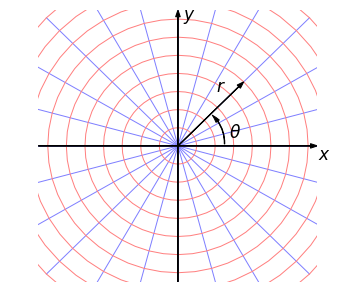

In [443]:
fig = plt.figure(figsize=(5,5))
def plot_polar():
    theta = np.linspace(-np.pi, np.pi, 25).reshape((-1,1))
    r = np.linspace(0,2,11).reshape((-1,1))
    Y = np.sin(theta).T * np.array([r[0], r[-1]])
    X = np.cos(theta).T * np.array([r[0], r[-1]])

    style="Simple,tail_width=0.5,head_width=4,head_length=8"
    kw = dict(arrowstyle=style, color="k", zorder=5)

    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)
    theta = np.linspace(-np.pi, np.pi, 49).reshape((-1,1))
    Y = r.T * np.sin(theta)
    X = r.T * np.cos(theta)
    ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
    ax.arrow(0,-1.5,0,3,color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.05, zorder=5)
    ax.text(0.05, 1.4, r'$y$', fontsize=17)
    ax.arrow(-1.5,0,3,0,color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.05, zorder=5)
    ax.text(1.51, -0.15, r'$x$', fontsize=17)
    ax.arrow(0,0,np.sqrt(.5),np.sqrt(.5),color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.05, zorder=5)
    ax.text(.5**.5-.3, .5 ** .5-.1, r'$r$', fontsize=17)
    ax.text(.55, .1, r'$\theta$', fontsize=17)
    a3 = patches.FancyArrowPatch((0.5,0.), (.5*.5**.5,.5*0.5**.5),connectionstyle="arc3,rad=.25", **kw)
    ax.add_patch(a3)
    #ax.set_title('Polar coordinates', fontsize=17)
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    ax.set_axis_off()
plot_polar()
plt.savefig('polar.pdf', bbox_inches='tight')

In [450]:
patches.ConnectionStyle?

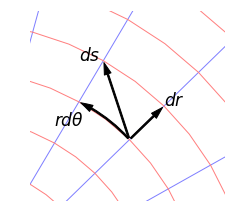

In [463]:
fig = plt.figure(figsize=(3.5,3.5))
def plot_polar():
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')
    theta = np.linspace(0, 2*np.pi, 25).reshape((-1,1))
    r = np.linspace(0,2,11).reshape((-1,1))
    Y = np.sin(theta).T * np.array([r[0], r[-1]])
    X = np.cos(theta).T * np.array([r[0], r[-1]])

    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)
    theta = np.linspace(0, 2*np.pi, 49).reshape((-1,1))
    Y = r.T * np.sin(theta)
    X = r.T * np.cos(theta)
    ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)

    style="Simple,tail_width=1.5,head_width=7,head_length=12"
    kw = dict(arrowstyle=style, color="k", zorder=5)

    #ax.arrow(X[6,5],Y[6,5],X[6,6]-X[6,5],Y[6,6]-Y[6,5],color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.03, zorder=5)
    ax.text(X[6,6],Y[6,6], r'$dr$', fontsize=17)
    #ax.arrow(X[6,5],Y[6,5],X[8,5]-X[6,5],Y[8,5]-Y[6,5],color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.03, zorder=5)
    ax.text(X[8,5]-.1,Y[8,5]-.1, r'$rd\theta$', fontsize=17)
    #ax.arrow(X[6,5],Y[6,5],X[8,6]-X[6,5],Y[8,6]-Y[6,5],color='k',linewidth=None,width=0.005, length_includes_head=True,head_width=0.03, zorder=5)
    ax.text(X[8,6]-.1,Y[8,6], r'$ds$', fontsize=17)
    ax.add_patch(patches.FancyArrowPatch((X[6,5],Y[6,5]),(X[6,6],Y[6,6]), **kw))
    ax.add_patch(patches.FancyArrowPatch((X[6,5],Y[6,5]),(X[8,6],Y[8,6]), **kw))
    ax.add_patch(patches.FancyArrowPatch((X[6,5],Y[6,5]),(X[8,5],Y[8,5]), connectionstyle="arc3,rad=.1", **kw))
    #ax.arrow(X[8,5],Y[8,5],X[8,6]-X[8,5],Y[8,6]-Y[8,5],color='k',linewidth=None,width=0.005, head_width=0, zorder=5)
    #ax.arrow(X[6,6],Y[6,6],X[8,6]-X[6,6],Y[8,6]-Y[6,6],color='k',linewidth=None,width=0.005, head_width=0, zorder=5)
    #ax.set_title('Polar coordinates', fontsize=17)
    ax.set_xlim([.3,1.1])
    ax.set_ylim([.45,1.25])
    ax.set_axis_off()
plot_polar()
plt.savefig('polar_d.pdf', bbox_inches='tight')

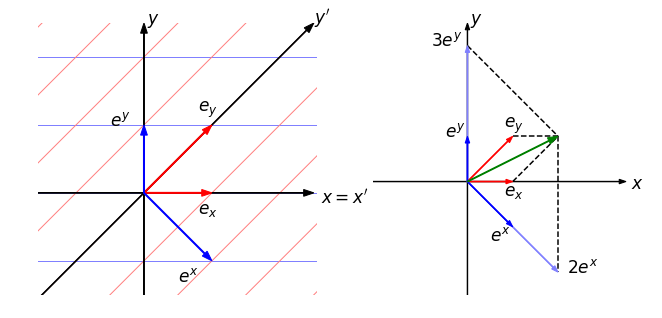

In [529]:
fig = plt.figure(figsize=(11,5))
def draw_cov(ax,scale=1):
    ax.arrow(0,0,1*scale,0,color='r',linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=20)
    ax.text(scale-.2, -0.3, r'$e_x$', fontsize=17)
    ax.arrow(0,0,1*scale,1*scale,color='r',linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=20)
    ax.text(scale-.2, scale+.2, r'$e_y$', fontsize=17)
    ax.arrow(0,0,1/scale,-1/scale,color='b',linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=20)
    ax.text(1/scale-.5, -1/scale-.3, r'$e^x$', fontsize=17)
    ax.arrow(0,0,0,1/scale,color='b',linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=20)
    ax.text(-.5, 1/scale, r'$e^y$', fontsize=17)
def draw_axes(ax,scale=2):
    ax.arrow(0,-scale,0,2*scale,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
    ax.text(0.05, scale, r'$y$', fontsize=17)
    ax.arrow(-scale,0,2*scale,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
    ax.text(scale+.1, -0.15, r'$x$', fontsize=17)
def draw_axes2(ax,scale=2):
    ax.arrow(0,-scale,0,2*scale+.5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
    ax.text(0.05, scale+.5, r'$y$', fontsize=17)
    ax.arrow(-scale,-scale,scale*2+.5,scale*2+.5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
    ax.text(scale+.5, scale+.5, r'$y^\prime$', fontsize=17)
    ax.arrow(-scale,0,2*scale+.5,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
    ax.text(scale+.6, -0.15, r'$x=x^\prime$', fontsize=17)
def draw_green(ax,scale=1):
    ax.arrow(0,0,2,1,color='g',linewidth=None,width=0.02,length_includes_head=True,head_width=0.15, zorder=30)
    ax.plot([1,2],[0,1],color='k',linestyle='--', zorder=10)
    ax.plot([1,2],[1,1],color='k',linestyle='--', zorder=10)
    ax.plot([2,2],[1,-2],color='k',linestyle='--', zorder=10)
    ax.plot([0,2],[3,1],color='k',linestyle='--', zorder=10)
    ax.arrow(0,0,2,-2,color=[.5,.5,1],linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=10)
    ax.text(2.2, -2, r'${}e^x$'.format(2*scale), fontsize=17)
    ax.arrow(0,0,0,3,color=[.5,.5,1],linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=10)
    ax.text(-.8, 3, r'${}e^y$'.format(3*scale), fontsize=17)
def plot_oblique():
    y = np.linspace(-4, 4, 9).reshape((-1,1))
    x = np.linspace(-4, 4, 9).reshape((-1,1))
    Y = y.T + 0. * np.array([x[0], x[-1]])
    X = y.T + np.array([x[0], x[-1]])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)

    Y = (np.hstack([y[0], y[-1]])).T
    X = (np.hstack([y[0], y[-1]]) + x).T
    ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)

    draw_axes2(ax)
    draw_cov(ax)
    ax.axis('equal')
    ax.set_xlim([-1.5,2.5])
    ax.set_ylim([-1.5,2.5])
    ax.set_axis_off()

    ax = fig.add_subplot(1, 2, 2)
    draw_axes(ax,3.5)
    draw_cov(ax)
    draw_green(ax)
    ax.axis('equal')
    #ax.set_xlim([-1.5,4])
    ax.set_ylim([-2.5,3.5])
    ax.set_axis_off()
plot_oblique()
plt.savefig('oblique.pdf', bbox_inches='tight')

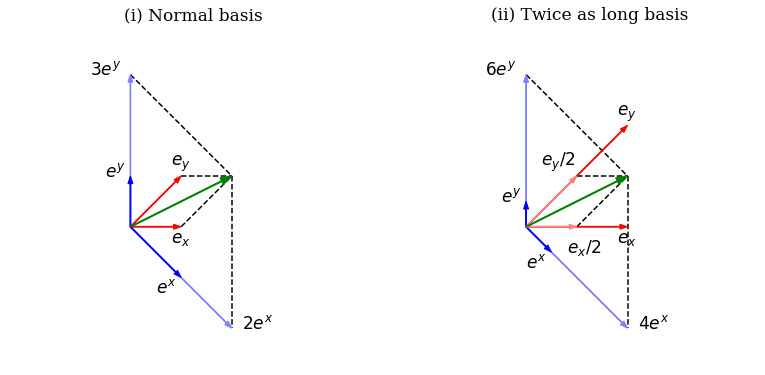

In [528]:
fig = plt.figure(figsize=(13,6))
def plot_oblique2():
    ax = fig.add_subplot(1, 2, 1)

    #draw_axes(ax,3.5)
    draw_cov(ax,1)
    draw_green(ax)
    ax.axis('equal')
    ax.set_xlim([-2,4.5])
    ax.set_ylim([-2.5,4])
    ax.set_axis_off()
    ax.set_title('(i) Normal basis',fontsize=17)

    ax = fig.add_subplot(1,2,2)
    #draw_axes(ax,3.5)
    draw_cov(ax,2)
    draw_green(ax,2)
    ax.arrow(0,0,1,0,color=[1,.5,.5],linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=20)
    ax.text(.3, 1.2, r'$e_y/2$', fontsize=17)
    ax.arrow(0,0,1,1,color=[1,.5,.5],linewidth=None,width=0.015,length_includes_head=True,head_width=0.1, zorder=20)
    ax.text(.8, -0.5, r'$e_x/2$', fontsize=17)
    ax.axis('equal')
    ax.set_xlim([-2,4.5])
    ax.set_ylim([-2.5,4])
    ax.set_axis_off()
    ax.set_title('(ii) Twice as long basis',fontsize=17)

plot_oblique2()
plt.savefig('oblique2.pdf', bbox_inches='tight')

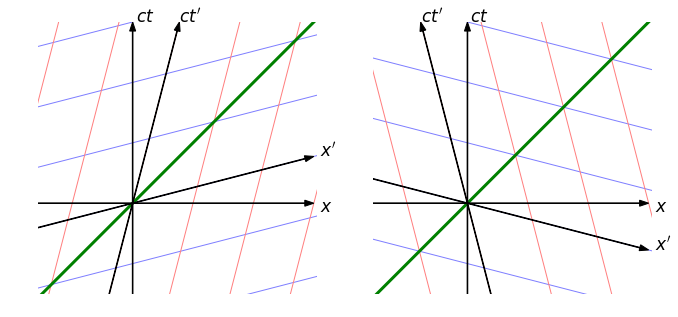

In [400]:
fig = plt.figure(figsize=(11,5))
def plot_minkow():
    def offset(v):
        return v/abs(v)*((v**-2)-1)**-.5
    def plot_grid(ax, v):
        factor = offset(v)
        y = np.linspace(-4, 4, 9).reshape((-1,1))
        x = np.linspace(-4, 4, 9).reshape((-1,1))
        Y = y.T + factor * np.array([x[0], x[-1]])
        X = np.array([x[0], x[-1]])
        ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)

        Y = (np.hstack([y[0], y[-1]])).T
        X = (np.hstack([y[0], y[-1]]) * factor + x).T
        ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
        ax.arrow(0,-2.,0,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(0.05, 3, r'$ct$', fontsize=17)
        ax.arrow(-2.,0,5,0,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(3.1, -0.15, r'$x$', fontsize=17)
        ax.arrow(-2 * factor,-2.,5 * factor,5,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(3 * factor, 3, r'$ct^\prime$', fontsize=17)
        ax.arrow(-2.,-2 * factor,5,5 * factor,color='k',linewidth=None,width=0.01,length_includes_head=True,head_width=0.1, zorder=5)
        ax.text(3.1, 3 * factor, r'$x^\prime$', fontsize=17)
        ax.plot([-2,3],[-2,3],color='g',linewidth=3)

    ax = fig.add_subplot(1, 2, 1)
    plot_grid(ax, .25)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()

    ax = fig.add_subplot(1, 2, 2)
    plot_grid(ax, -.25)
    ax.axis('equal')
    ax.set_xlim([-1.5,3])
    ax.set_ylim([-1.5,3])
    ax.set_axis_off()
plot_minkow()
plt.savefig('minkow.pdf', bbox_inches='tight')

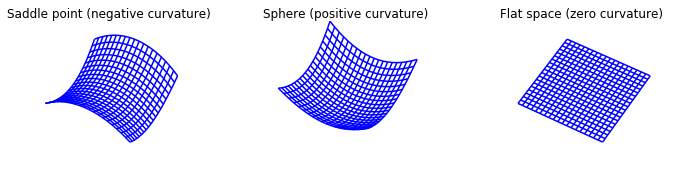

In [31]:
fig = plt.figure(figsize=(12,3))
def plot_func(i, fun, name, caption):
    x = np.linspace(-1,1,20)
    y = np.linspace(-1,1,20)
    X, Y = np.meshgrid(x, y)
    z = fun(X,Y)

    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.plot_wireframe(X,Y,z,color='b')
    ax.view_init(70, 30)
    ax.set_title(caption)
    ax.set_axis_off()
    #plt.axis('off')

plot_func(1, lambda x,y: X ** 2 - Y ** 2, 'saddle.pdf', 'Saddle point (negative curvature)')
plot_func(2, lambda x,y: X ** 2 + Y ** 2, 'sphere.pdf', 'Sphere (positive curvature)')
plot_func(3, lambda x,y: 0, 'flat.pdf', 'Flat space (zero curvature)')
plt.savefig('saddle.png', bbox_inches='tight')


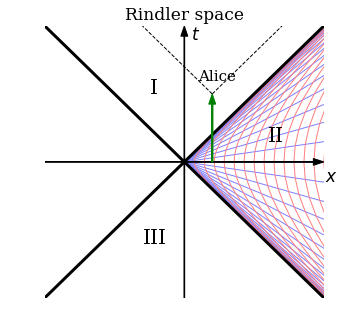

In [405]:
fig = plt.figure(figsize=(5,5))
def plot_rindler(i, fun, name, caption):
    omg = np.linspace(-3, 3,41).reshape((-1,1))
    r = np.linspace(0,1,15).reshape((-1,1))
    Y = np.sinh(omg).T * np.array([r[0], r[-1]])
    X = np.cosh(omg).T * np.array([r[0], r[-1]])

    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X,Y,color=[0.5,0.5,1],linewidth=1)
    Y = r.T * np.sinh(omg)
    X = r.T * np.cosh(omg)
    ax.plot(X,Y,color=[1,0.5,0.5],linewidth=1)
    ax.plot([-1,1],[-1,1],color='k',linewidth=3)
    ax.plot([-1,1],[1,-1],color='k',linewidth=3)
    ax.text(-0.25, 0.5, r'I', fontsize=20, family='serif')
    ax.text(0.6, 0.15, r'II', fontsize=20, family='serif')
    ax.text(-0.3, -0.6, r'III', fontsize=20, family='serif')
    ax.arrow(0,-1,0,2,color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.05, zorder=5)
    ax.text(0.05, 0.9, r'$t$', fontsize=17)
    ax.arrow(-1,0,2,0,color='k',linewidth=None,width=0.005,length_includes_head=True,head_width=0.05, zorder=5)
    ax.text(1.01, -0.15, r'$x$', fontsize=17)
    ax.arrow(0.2,0,0,0.5,color=[0,0.5,0],linewidth=None,width=0.01,length_includes_head=True,head_width=0.05, zorder=10)
    ax.text(0.1, 0.6, r'Alice', fontsize=15)
    ax.plot([0.2,0.7],[0.5,1],'--k',linewidth=1)
    ax.plot([0.2,-0.3],[0.5,1],'--k',linewidth=1)
    ax.set_title(caption, fontsize=17)
    ax.grid()
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_axis_off()
    #plt.axis('off')
plot_rindler(1, None, None, 'Rindler space')
plt.savefig('rindler.png', bbox_inches='tight')

In [418]:
sp.misc.factorial(24) / sp.misc.factorial(24-12) / sp.misc.factorial(12)

2704156.0

In [420]:
(sp.misc.factorial(12) / sp.misc.factorial(12-6) / sp.misc.factorial(6)) ** 2

853776.0